In [1]:
# Load all files from data_generated/test/outputs/ 

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import rcParams


# Load all files from data_generated/test/outputs/ to diferet arrays
def load_data():
    # Get all files from data_generated/test/outputs/
    files = os.listdir("../data_generated/test/outputs/")
    files.sort()
    # Load all files to diferent arrays names as the file name
    for file in files:
        globals()[file] = np.loadtxt("../data_generated/test/outputs/" + file)
    return files

# Save in individuals arrays the data from the files named Autoencoder, IsolationForest, NN, OneClassSVM, RandomForestClassifier, SVM, TrueOutput
def save_data(files):
    # Save in individuals arrays vars the data from the files named Autoencoder, IsolationForest, NN, OneClassSVM, RandomForestClassifier, SVM, TrueOutput
    i = 0
    for file in files:
        print(file)
        i+=1
        if i == 1:
            Autoencoder = globals()[file]
        elif i == 2:
            IsolationForest = globals()[file]
        elif i == 3:
            NN = globals()[file]
        elif i == 4:
            OneClassSVM = globals()[file]
        elif i == 5:
            RandomForestClassifier = globals()[file]
        elif i == 6:
            SVM = globals()[file]
        elif i == 7:
            TrueOutput = globals()[file]

    return Autoencoder, IsolationForest, NN, OneClassSVM, RandomForestClassifier, SVM, TrueOutput

 
    

In [2]:
files = load_data()
Autoencoder, IsolationForest, NN, OneClassSVM, RandomForestClassifier, SVM, TrueOutput = save_data(files)

_outputs_Autoencoder.csv
_outputs_IsolationForest.csv
_outputs_NN.csv
_outputs_OneClassSVM.csv
_outputs_RandomForestClassifier.csv
_outputs_SVC.csv
_outputs_True_y.csv


In [3]:
# print percentage of anomalies detected
print("Autoencoder")
print(np.sum(Autoencoder)/len(Autoencoder))
print("IsolationForest")
print(np.sum(IsolationForest)/len(IsolationForest))
print("NN")
print(np.sum(NN)/len(NN))
print("OneClassSVM")
print(np.sum(OneClassSVM)/len(OneClassSVM))
print("RandomForestClassifier")
print(np.sum(RandomForestClassifier)/len(RandomForestClassifier))
print("SVM")
print(np.sum(SVM)/len(SVM))
print("TrueOutput")
print(np.sum(TrueOutput)/len(TrueOutput))


Autoencoder
0.04004769252349558
IsolationForest
0.19841492495441157
NN
0.019848506101837565
OneClassSVM
0.4781876841071679
RandomForestClassifier
0.07097769673165942
SVM
0.015991022583812596
TrueOutput
0.01472857343245897


In [4]:
# save the position of the anomalies detected in the arrays
Autoencoder_anomalies = []
IsolationForest_anomalies = []
NN_anomalies = []
OneClassSVM_anomalies = []
RandomForestClassifier_anomalies = []
SVM_anomalies = []
TrueOutput_anomalies = []

for i in range(len(Autoencoder)):
    if Autoencoder[i] == 1:
        Autoencoder_anomalies.append(i)
    if IsolationForest[i] == 1:
        IsolationForest_anomalies.append(i)
    if NN[i] == 1:
        NN_anomalies.append(i)
    if OneClassSVM[i] == 1:
        OneClassSVM_anomalies.append(i)
    if RandomForestClassifier[i] == 1:
        RandomForestClassifier_anomalies.append(i)
    if SVM[i] == 1:
        SVM_anomalies.append(i)
    if TrueOutput[i] == 1:
        TrueOutput_anomalies.append(i)

In [5]:
# Compare TrueOutput_anomalies with the other arrays. kept the position of the anomalies if they are in TrueOutput_anomalies.
Autoencoder_anomalies = [x for x in Autoencoder_anomalies if x in TrueOutput_anomalies]
IsolationForest_anomalies = [x for x in IsolationForest_anomalies if x in TrueOutput_anomalies]
NN_anomalies = [x for x in NN_anomalies if x in TrueOutput_anomalies]
OneClassSVM_anomalies = [x for x in OneClassSVM_anomalies if x in TrueOutput_anomalies]
RandomForestClassifier_anomalies = [x for x in RandomForestClassifier_anomalies if x in TrueOutput_anomalies]
SVM_anomalies = [x for x in SVM_anomalies if x in TrueOutput_anomalies]

# print percentage of anomalies detected
print("Autoencoder")
print(len(Autoencoder_anomalies)/len(TrueOutput_anomalies))
print("IsolationForest")
print(len(IsolationForest_anomalies)/len(TrueOutput_anomalies))
print("NN")
print(len(NN_anomalies)/len(TrueOutput_anomalies))
print("OneClassSVM")
print(len(OneClassSVM_anomalies)/len(TrueOutput_anomalies))
print("RandomForestClassifier")
print(len(RandomForestClassifier_anomalies)/len(TrueOutput_anomalies))
print("SVM")
print(len(SVM_anomalies)/len(TrueOutput_anomalies))
print("TrueOutput")
print(len(TrueOutput_anomalies)/len(TrueOutput_anomalies))


Autoencoder
0.7761904761904762
IsolationForest
0.5190476190476191
NN
0.8
OneClassSVM
0.7523809523809524
RandomForestClassifier
0.7571428571428571
SVM
0.7952380952380952
TrueOutput
1.0


In [6]:
# Assuming you have lists like Autoencoder_anomalies, IsolationForest_anomalies, etc.

# Creating sets for efficiency
Autoencoder_anomalies_set = set(Autoencoder_anomalies)
IsolationForest_anomalies_set = set(IsolationForest_anomalies)
NN_anomalies_set = set(NN_anomalies)
OneClassSVM_anomalies_set = set(OneClassSVM_anomalies)
RandomForestClassifier_anomalies_set = set(RandomForestClassifier_anomalies)
SVM_anomalies_set = set(SVM_anomalies)

# Intersections
Autoencoder_IsolationForest = Autoencoder_anomalies_set.intersection(IsolationForest_anomalies_set)
Autoencoder_NN = Autoencoder_anomalies_set.intersection(NN_anomalies_set)
Autoencoder_OneClassSVM = Autoencoder_anomalies_set.intersection(OneClassSVM_anomalies_set)
Autoencoder_RandomForest = Autoencoder_anomalies_set.intersection(RandomForestClassifier_anomalies_set)
Autoencoder_SVM = Autoencoder_anomalies_set.intersection(SVM_anomalies_set)

IsolationForest_NN = IsolationForest_anomalies_set.intersection(NN_anomalies_set)
IsolationForest_OneClassSVM = IsolationForest_anomalies_set.intersection(OneClassSVM_anomalies_set)
IsolationForest_RandomForest = IsolationForest_anomalies_set.intersection(RandomForestClassifier_anomalies_set)
IsolationForest_SVM = IsolationForest_anomalies_set.intersection(SVM_anomalies_set)

NN_OneClassSVM = NN_anomalies_set.intersection(OneClassSVM_anomalies_set)
NN_RandomForest = NN_anomalies_set.intersection(RandomForestClassifier_anomalies_set)
NN_SVM = NN_anomalies_set.intersection(SVM_anomalies_set)

OneClassSVM_RandomForest = OneClassSVM_anomalies_set.intersection(RandomForestClassifier_anomalies_set)
OneClassSVM_SVM = OneClassSVM_anomalies_set.intersection(SVM_anomalies_set)

RandomForest_SVM = RandomForestClassifier_anomalies_set.intersection(SVM_anomalies_set)


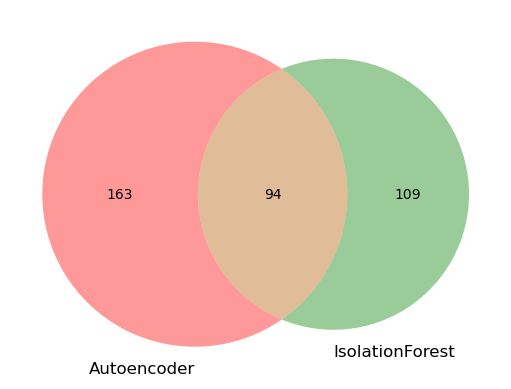

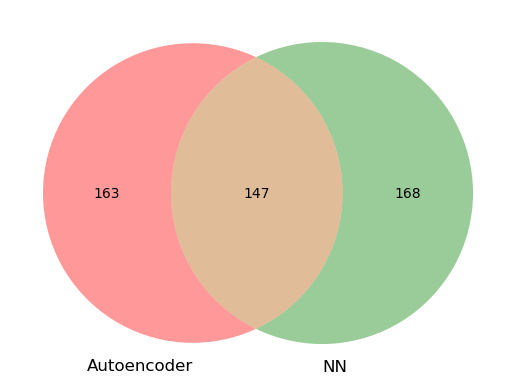

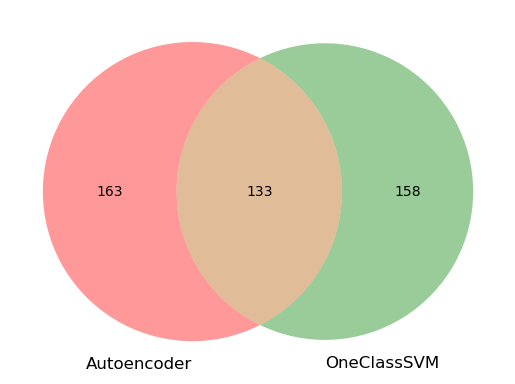

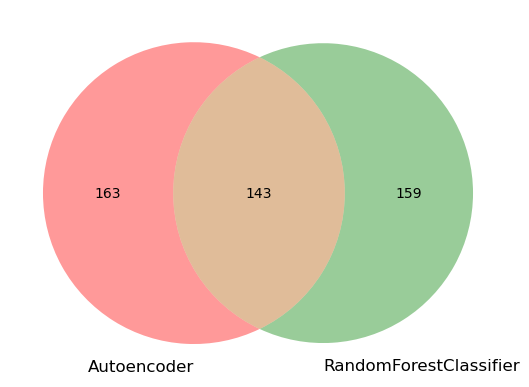

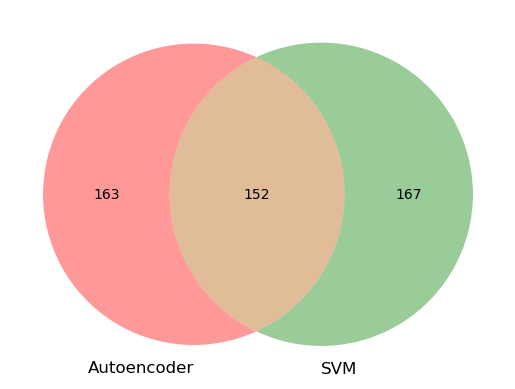

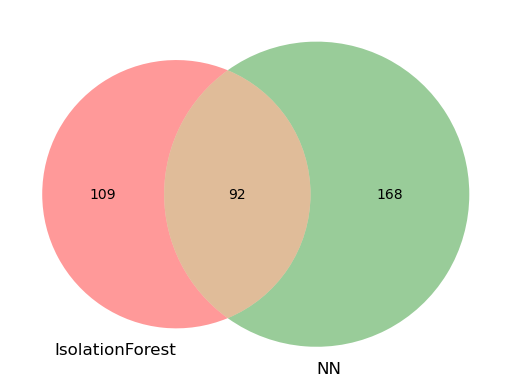

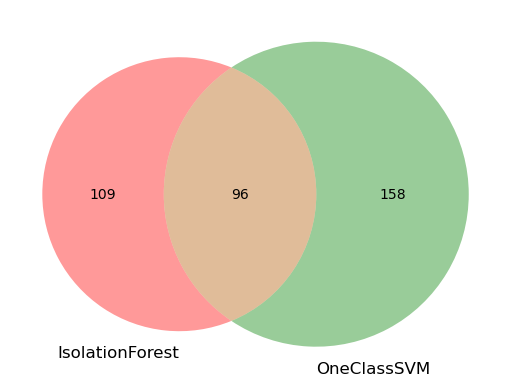

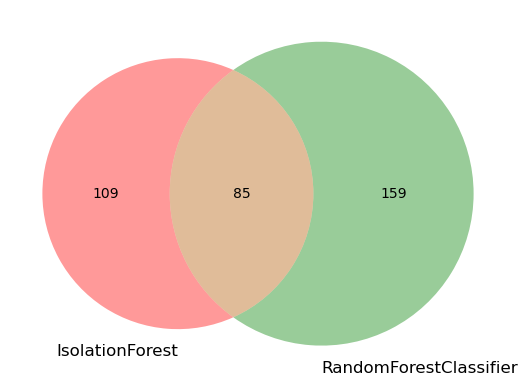

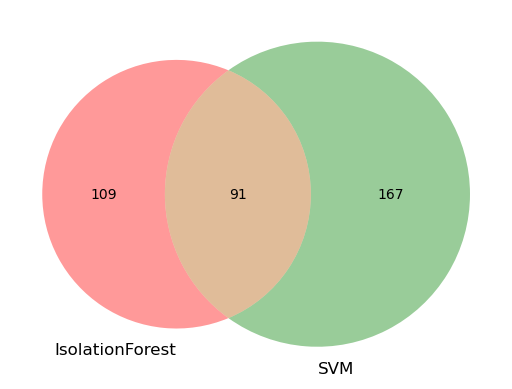

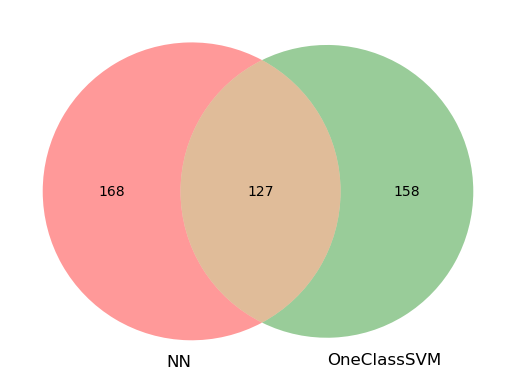

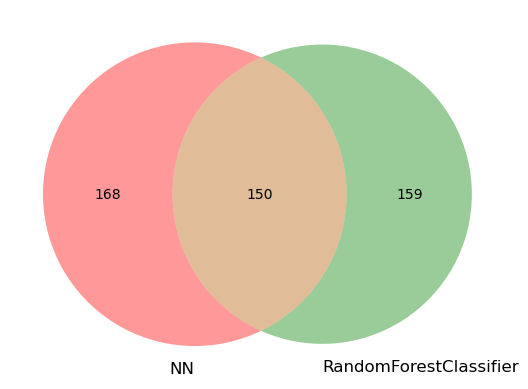

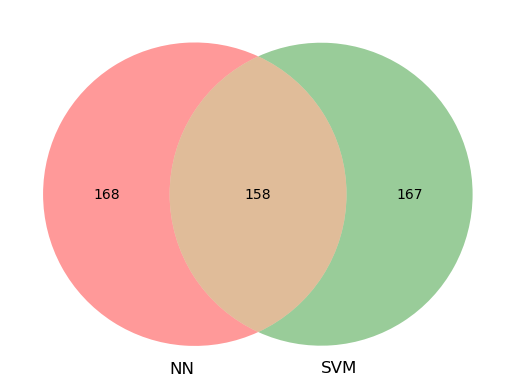

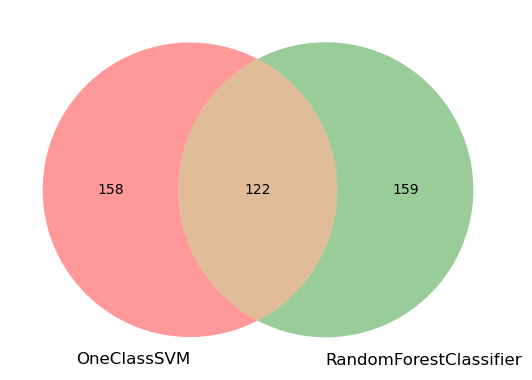

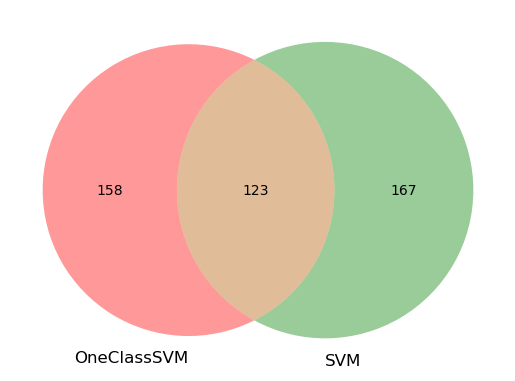

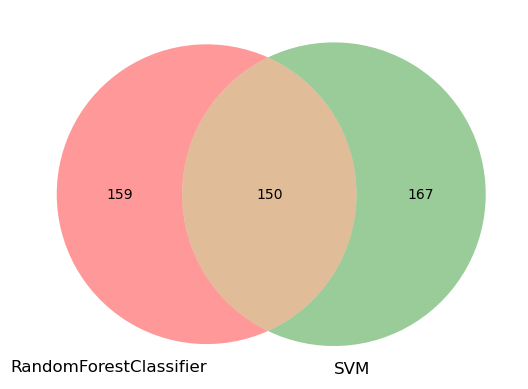

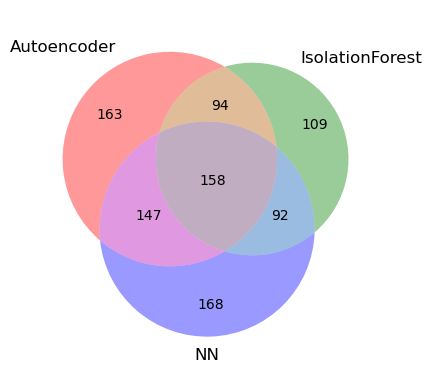

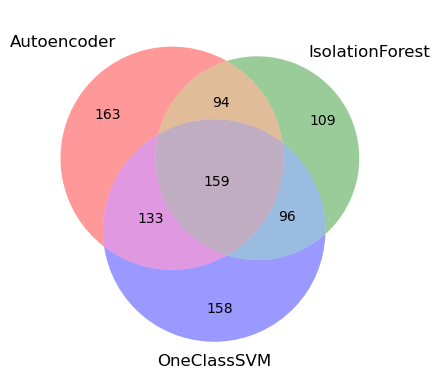

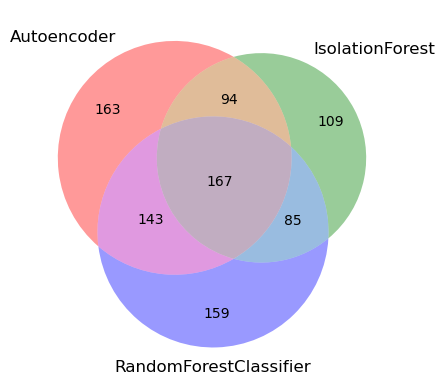

In [7]:
# Plot the Venn diagram
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from matplotlib_venn import venn3_circles

venn2(subsets = (len(Autoencoder_anomalies_set), len(IsolationForest_anomalies_set), len(Autoencoder_IsolationForest)), set_labels = ('Autoencoder', 'IsolationForest'))
plt.show()

venn2(subsets = (len(Autoencoder_anomalies_set), len(NN_anomalies_set), len(Autoencoder_NN)), set_labels = ('Autoencoder', 'NN'))
plt.show()

venn2(subsets = (len(Autoencoder_anomalies_set), len(OneClassSVM_anomalies_set), len(Autoencoder_OneClassSVM)), set_labels = ('Autoencoder', 'OneClassSVM'))
plt.show()

venn2(subsets = (len(Autoencoder_anomalies_set), len(RandomForestClassifier_anomalies_set), len(Autoencoder_RandomForest)), set_labels = ('Autoencoder', 'RandomForestClassifier'))
plt.show()

venn2(subsets = (len(Autoencoder_anomalies_set), len(SVM_anomalies_set), len(Autoencoder_SVM)), set_labels = ('Autoencoder', 'SVM'))
plt.show()

venn2(subsets = (len(IsolationForest_anomalies_set), len(NN_anomalies_set), len(IsolationForest_NN)), set_labels = ('IsolationForest', 'NN'))
plt.show()

venn2(subsets = (len(IsolationForest_anomalies_set), len(OneClassSVM_anomalies_set), len(IsolationForest_OneClassSVM)), set_labels = ('IsolationForest', 'OneClassSVM'))
plt.show()

venn2(subsets = (len(IsolationForest_anomalies_set), len(RandomForestClassifier_anomalies_set), len(IsolationForest_RandomForest)), set_labels = ('IsolationForest', 'RandomForestClassifier'))
plt.show()

venn2(subsets = (len(IsolationForest_anomalies_set), len(SVM_anomalies_set), len(IsolationForest_SVM)), set_labels = ('IsolationForest', 'SVM'))
plt.show()

venn2(subsets = (len(NN_anomalies_set), len(OneClassSVM_anomalies_set), len(NN_OneClassSVM)), set_labels = ('NN', 'OneClassSVM'))
plt.show()

venn2(subsets = (len(NN_anomalies_set), len(RandomForestClassifier_anomalies_set), len(NN_RandomForest)), set_labels = ('NN', 'RandomForestClassifier'))
plt.show()

venn2(subsets = (len(NN_anomalies_set), len(SVM_anomalies_set), len(NN_SVM)), set_labels = ('NN', 'SVM'))
plt.show()

venn2(subsets = (len(OneClassSVM_anomalies_set), len(RandomForestClassifier_anomalies_set), len(OneClassSVM_RandomForest)), set_labels = ('OneClassSVM', 'RandomForestClassifier'))
plt.show()

venn2(subsets = (len(OneClassSVM_anomalies_set), len(SVM_anomalies_set), len(OneClassSVM_SVM)), set_labels = ('OneClassSVM', 'SVM'))
plt.show()

venn2(subsets = (len(RandomForestClassifier_anomalies_set), len(SVM_anomalies_set), len(RandomForest_SVM)), set_labels = ('RandomForestClassifier', 'SVM'))
plt.show()

venn3(subsets = (len(Autoencoder_anomalies_set), len(IsolationForest_anomalies_set), len(Autoencoder_IsolationForest), len(NN_anomalies_set), len(Autoencoder_NN), len(IsolationForest_NN), len(OneClassSVM_anomalies_set), len(Autoencoder_OneClassSVM), len(IsolationForest_OneClassSVM), len(NN_OneClassSVM), len(RandomForestClassifier_anomalies_set), len(Autoencoder_RandomForest), len(IsolationForest_RandomForest), len(NN_RandomForest), len(OneClassSVM_RandomForest), len(SVM_anomalies_set), len(Autoencoder_SVM), len(IsolationForest_SVM), len(NN_SVM), len(OneClassSVM_SVM), len(RandomForest_SVM)), set_labels = ('Autoencoder', 'IsolationForest', 'NN'))
plt.show()

venn3(subsets = (len(Autoencoder_anomalies_set), len(IsolationForest_anomalies_set), len(Autoencoder_IsolationForest), len(OneClassSVM_anomalies_set), len(Autoencoder_OneClassSVM), len(IsolationForest_OneClassSVM), len(RandomForestClassifier_anomalies_set), len(Autoencoder_RandomForest), len(IsolationForest_RandomForest), len(OneClassSVM_RandomForest), len(SVM_anomalies_set), len(Autoencoder_SVM), len(IsolationForest_SVM), len(OneClassSVM_SVM), len(RandomForest_SVM)), set_labels = ('Autoencoder', 'IsolationForest', 'OneClassSVM'))
plt.show()

venn3(subsets = (len(Autoencoder_anomalies_set), len(IsolationForest_anomalies_set), len(Autoencoder_IsolationForest), len(RandomForestClassifier_anomalies_set), len(Autoencoder_RandomForest), len(IsolationForest_RandomForest), len(SVM_anomalies_set), len(Autoencoder_SVM), len(IsolationForest_SVM), len(RandomForest_SVM)), set_labels = ('Autoencoder', 'IsolationForest', 'RandomForestClassifier'))
plt.show()




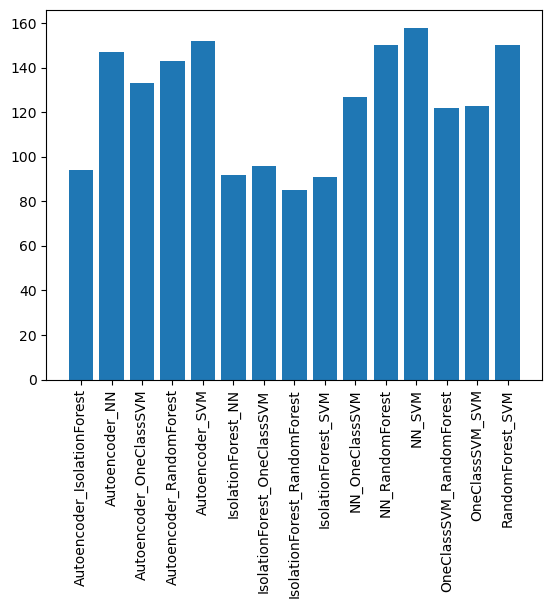

In [8]:
# Do a bar plot comparing the length of the intercept arrays
# Create a list with the length of the intercept arrays
length = []
length.append(len(Autoencoder_IsolationForest))
length.append(len(Autoencoder_NN))
length.append(len(Autoencoder_OneClassSVM))
length.append(len(Autoencoder_RandomForest))
length.append(len(Autoencoder_SVM))
length.append(len(IsolationForest_NN))
length.append(len(IsolationForest_OneClassSVM))
length.append(len(IsolationForest_RandomForest))
length.append(len(IsolationForest_SVM))
length.append(len(NN_OneClassSVM))
length.append(len(NN_RandomForest))
length.append(len(NN_SVM))
length.append(len(OneClassSVM_RandomForest))
length.append(len(OneClassSVM_SVM))
length.append(len(RandomForest_SVM))

# Plot a bar plot
plt.bar(np.arange(15), length)
plt.xticks(np.arange(15), ('Autoencoder_IsolationForest', 'Autoencoder_NN', 'Autoencoder_OneClassSVM', 'Autoencoder_RandomForest', 'Autoencoder_SVM', 'IsolationForest_NN', 'IsolationForest_OneClassSVM', 'IsolationForest_RandomForest', 'IsolationForest_SVM', 'NN_OneClassSVM', 'NN_RandomForest', 'NN_SVM', 'OneClassSVM_RandomForest', 'OneClassSVM_SVM', 'RandomForest_SVM'), rotation=90)
plt.show()




In [9]:
Autoencoder_IsolationForest_un = Autoencoder_anomalies_set.union(IsolationForest_anomalies_set)
print(len(Autoencoder_IsolationForest_un))
print(len(Autoencoder_anomalies_set))
print(len(IsolationForest_anomalies_set))
intercept = Autoencoder_anomalies_set.intersection(IsolationForest_anomalies_set)
print(len(intercept))
print(len(Autoencoder_IsolationForest_un.difference(Autoencoder_anomalies_set.intersection(IsolationForest_anomalies_set))))

178
163
109
94
84


In [10]:
# Instead of intersecting the sets, do 1 vs 1 and keep both everything except the intersection

# Autoencoder vs IsolationForest
Autoencoder_IsolationForest_un = Autoencoder_anomalies_set.union(IsolationForest_anomalies_set)
Autoencoder_IsolationForest_un = Autoencoder_IsolationForest_un.difference(Autoencoder_anomalies_set.intersection(IsolationForest_anomalies_set))

# Autoencoder vs NN
Autoencoder_NN_un = Autoencoder_anomalies_set.union(NN_anomalies_set)
Autoencoder_NN_un = Autoencoder_NN_un.difference(Autoencoder_anomalies_set.intersection(NN_anomalies_set))

# Autoencoder vs OneClassSVM
Autoencoder_OneClassSVM_un = Autoencoder_anomalies_set.union(OneClassSVM_anomalies_set)
Autoencoder_OneClassSVM_un = Autoencoder_OneClassSVM_un.difference(Autoencoder_anomalies_set.intersection(OneClassSVM_anomalies_set))

# Autoencoder vs RandomForestClassifier
Autoencoder_RandomForest_un = Autoencoder_anomalies_set.union(RandomForestClassifier_anomalies_set)
Autoencoder_RandomForest_un = Autoencoder_RandomForest_un.difference(Autoencoder_anomalies_set.intersection(RandomForestClassifier_anomalies_set))

# Autoencoder vs SVM
Autoencoder_SVM_un = Autoencoder_anomalies_set.union(SVM_anomalies_set)
Autoencoder_SVM_un = Autoencoder_SVM_un.difference(Autoencoder_anomalies_set.intersection(SVM_anomalies_set))

# IsolationForest vs NN
IsolationForest_NN_un = IsolationForest_anomalies_set.union(NN_anomalies_set)
IsolationForest_NN_un = IsolationForest_NN_un.difference(IsolationForest_anomalies_set.intersection(NN_anomalies_set))

# IsolationForest vs OneClassSVM
IsolationForest_OneClassSVM_un = IsolationForest_anomalies_set.union(OneClassSVM_anomalies_set)
IsolationForest_OneClassSVM_un = IsolationForest_OneClassSVM_un.difference(IsolationForest_anomalies_set.intersection(OneClassSVM_anomalies_set))

# IsolationForest vs RandomForestClassifier
IsolationForest_RandomForest_un = IsolationForest_anomalies_set.union(RandomForestClassifier_anomalies_set)
IsolationForest_RandomForest_un = IsolationForest_RandomForest_un.difference(IsolationForest_anomalies_set.intersection(RandomForestClassifier_anomalies_set))

# IsolationForest vs SVM
IsolationForest_SVM_un = IsolationForest_anomalies_set.union(SVM_anomalies_set)
IsolationForest_SVM_un = IsolationForest_SVM_un.difference(IsolationForest_anomalies_set.intersection(SVM_anomalies_set))

# NN vs OneClassSVM
NN_OneClassSVM_un = NN_anomalies_set.union(OneClassSVM_anomalies_set)
NN_OneClassSVM_un = NN_OneClassSVM_un.difference(NN_anomalies_set.intersection(OneClassSVM_anomalies_set))

# NN vs RandomForestClassifier
NN_RandomForest_un = NN_anomalies_set.union(RandomForestClassifier_anomalies_set)
NN_RandomForest_un = NN_RandomForest_un.difference(NN_anomalies_set.intersection(RandomForestClassifier_anomalies_set))

# NN vs SVM
NN_SVM_un = NN_anomalies_set.union(SVM_anomalies_set)
NN_SVM_un = NN_SVM_un.difference(NN_anomalies_set.intersection(SVM_anomalies_set))

# OneClassSVM vs RandomForestClassifier
OneClassSVM_RandomForest_un = OneClassSVM_anomalies_set.union(RandomForestClassifier_anomalies_set)
OneClassSVM_RandomForest_un = OneClassSVM_RandomForest_un.difference(OneClassSVM_anomalies_set.intersection(RandomForestClassifier_anomalies_set))

# OneClassSVM vs SVM
OneClassSVM_SVM_un = OneClassSVM_anomalies_set.union(SVM_anomalies_set)
OneClassSVM_SVM_un = OneClassSVM_SVM_un.difference(OneClassSVM_anomalies_set.intersection(SVM_anomalies_set))

# RandomForestClassifier vs SVM
RandomForest_SVM_un = RandomForestClassifier_anomalies_set.union(SVM_anomalies_set)
RandomForest_SVM_un = RandomForest_SVM_un.difference(RandomForestClassifier_anomalies_set.intersection(SVM_anomalies_set))


84


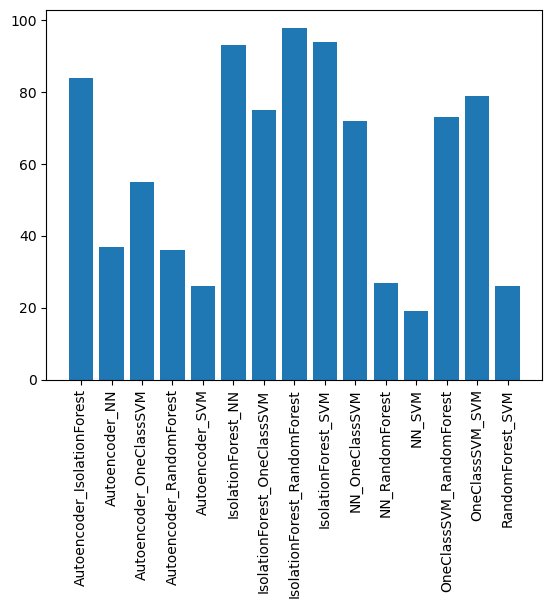

In [11]:
# Do a bar plot comparing the length of the arrays above
# Create a list with the length of the arrays above
length = []
length.append(len(Autoencoder_IsolationForest_un))
print(len(Autoencoder_IsolationForest_un))
length.append(len(Autoencoder_NN_un))
length.append(len(Autoencoder_OneClassSVM_un))
length.append(len(Autoencoder_RandomForest_un))
length.append(len(Autoencoder_SVM_un))
length.append(len(IsolationForest_NN_un))
length.append(len(IsolationForest_OneClassSVM_un))
length.append(len(IsolationForest_RandomForest_un))
length.append(len(IsolationForest_SVM_un))
length.append(len(NN_OneClassSVM_un))
length.append(len(NN_RandomForest_un))
length.append(len(NN_SVM_un))
length.append(len(OneClassSVM_RandomForest_un))
length.append(len(OneClassSVM_SVM_un))
length.append(len(RandomForest_SVM_un))

# Plot a bar plot
plt.bar(np.arange(15), length)
plt.xticks(np.arange(15), ('Autoencoder_IsolationForest', 'Autoencoder_NN', 'Autoencoder_OneClassSVM', 'Autoencoder_RandomForest', 'Autoencoder_SVM', 'IsolationForest_NN', 'IsolationForest_OneClassSVM', 'IsolationForest_RandomForest', 'IsolationForest_SVM', 'NN_OneClassSVM', 'NN_RandomForest', 'NN_SVM', 'OneClassSVM_RandomForest', 'OneClassSVM_SVM', 'RandomForest_SVM'), rotation=90)
plt.show()



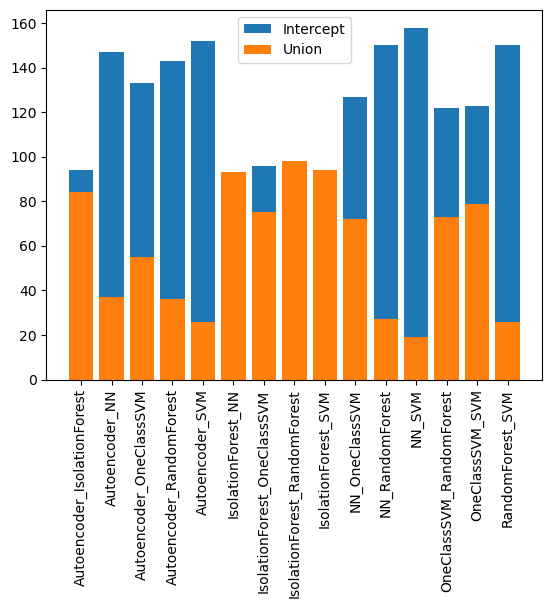

In [12]:
# Intercept last 2 plots 

# Do a bar plot comparing the length of the intercept arrays
# Create a list with the length of the intercept arrays
length = []
length.append(len(Autoencoder_IsolationForest))
length.append(len(Autoencoder_NN))
length.append(len(Autoencoder_OneClassSVM))
length.append(len(Autoencoder_RandomForest))
length.append(len(Autoencoder_SVM))
length.append(len(IsolationForest_NN))
length.append(len(IsolationForest_OneClassSVM))
length.append(len(IsolationForest_RandomForest))
length.append(len(IsolationForest_SVM))
length.append(len(NN_OneClassSVM))
length.append(len(NN_RandomForest))
length.append(len(NN_SVM))
length.append(len(OneClassSVM_RandomForest))
length.append(len(OneClassSVM_SVM))
length.append(len(RandomForest_SVM))

length0 = []
length0.append(len(Autoencoder_IsolationForest_un))
length0.append(len(Autoencoder_NN_un))
length0.append(len(Autoencoder_OneClassSVM_un))
length0.append(len(Autoencoder_RandomForest_un))
length0.append(len(Autoencoder_SVM_un))
length0.append(len(IsolationForest_NN_un))
length0.append(len(IsolationForest_OneClassSVM_un))
length0.append(len(IsolationForest_RandomForest_un))
length0.append(len(IsolationForest_SVM_un))
length0.append(len(NN_OneClassSVM_un))
length0.append(len(NN_RandomForest_un))
length0.append(len(NN_SVM_un))
length0.append(len(OneClassSVM_RandomForest_un))
length0.append(len(OneClassSVM_SVM_un))
length0.append(len(RandomForest_SVM_un))

#Intercept 2 plots length and length0 in same bar plot
plt.bar(np.arange(15), length)
plt.bar(np.arange(15), length0)

# legend color
plt.legend(['Intercept', 'Union'])


plt.xticks(np.arange(15), ('Autoencoder_IsolationForest', 'Autoencoder_NN', 'Autoencoder_OneClassSVM', 'Autoencoder_RandomForest', 'Autoencoder_SVM', 'IsolationForest_NN', 'IsolationForest_OneClassSVM', 'IsolationForest_RandomForest', 'IsolationForest_SVM', 'NN_OneClassSVM', 'NN_RandomForest', 'NN_SVM', 'OneClassSVM_RandomForest', 'OneClassSVM_SVM', 'RandomForest_SVM'), rotation=90)
plt.show()



#### Outlier visualization


In [31]:
import pandas as pd
df_tsne = pd.read_csv('../data_generated/test/inputs/X_test.csv')

# Remove last 2 columns
df_tsne = df_tsne.drop(df_tsne.columns[len(df_tsne.columns)-1], axis=1)
df_tsne = df_tsne.drop(df_tsne.columns[len(df_tsne.columns)-1], axis=1)


In [32]:
# Pass Autoencoder_anomalies to 1 and the rest to 0. The numers of the array are the index of the anomalies
True_Autoencoder_anomalies = np.zeros(len(df_tsne))
for i in Autoencoder_anomalies:
    True_Autoencoder_anomalies[i] = 1

Autoencoder_anomalies_not_detected = np.zeros(len(df_tsne))
for i in TrueOutput_anomalies:
    if i not in Autoencoder_anomalies:
        Autoencoder_anomalies_not_detected[i] = 2

# Substitue the 2s 
for i in range(len(Autoencoder_anomalies_not_detected)):
    if Autoencoder_anomalies_not_detected[i] == 2:
        True_Autoencoder_anomalies[i] = 2

# Pass IsolationForest_anomalies to 1 and the rest to 0. The numers of the array are the index of the anomalies
True_IsolationForest_anomalies = np.zeros(len(df_tsne))
for i in IsolationForest_anomalies:
    True_IsolationForest_anomalies[i] = 1

IsolationForest_anomalies_not_detected = np.zeros(len(df_tsne))
for i in TrueOutput_anomalies:
    if i not in IsolationForest_anomalies:
        IsolationForest_anomalies_not_detected[i] = 2

# Substitue the 2s
for i in range(len(IsolationForest_anomalies_not_detected)):
    if IsolationForest_anomalies_not_detected[i] == 2:
        True_IsolationForest_anomalies[i] = 2

# Pass NN_anomalies to 1 and the rest to 0. The numers of the array are the index of the anomalies
True_NN_anomalies = np.zeros(len(df_tsne))
for i in NN_anomalies:
    True_NN_anomalies[i] = 1

NN_anomalies_not_detected = np.zeros(len(df_tsne))
for i in TrueOutput_anomalies:
    if i not in NN_anomalies:
        NN_anomalies_not_detected[i] = 2

# Substitue the 2s
for i in range(len(NN_anomalies_not_detected)):
    if NN_anomalies_not_detected[i] == 2:
        True_NN_anomalies[i] = 2

# Pass OneClassSVM_anomalies to 1 and the rest to 0. The numers of the array are the index of the anomalies
True_OneClassSVM_anomalies = np.zeros(len(df_tsne))
for i in OneClassSVM_anomalies:
    True_OneClassSVM_anomalies[i] = 1

OneClassSVM_anomalies_not_detected = np.zeros(len(df_tsne))
for i in TrueOutput_anomalies:
    if i not in OneClassSVM_anomalies:
        OneClassSVM_anomalies_not_detected[i] = 2

# Substitue the 2s
for i in range(len(OneClassSVM_anomalies_not_detected)):
    if OneClassSVM_anomalies_not_detected[i] == 2:
        True_OneClassSVM_anomalies[i] = 2

# Pass RandomForestClassifier_anomalies to 1 and the rest to 0. The numers of the array are the index of the anomalies
True_RandomForestClassifier_anomalies = np.zeros(len(df_tsne))
for i in RandomForestClassifier_anomalies:
    True_RandomForestClassifier_anomalies[i] = 1

RandomForestClassifier_anomalies_not_detected = np.zeros(len(df_tsne))
for i in TrueOutput_anomalies:
    if i not in RandomForestClassifier_anomalies:
        RandomForestClassifier_anomalies_not_detected[i] = 2

# Substitue the 2s
for i in range(len(RandomForestClassifier_anomalies_not_detected)):
    if RandomForestClassifier_anomalies_not_detected[i] == 2:
        True_RandomForestClassifier_anomalies[i] = 2

# Pass SVM_anomalies to 1 and the rest to 0. The numers of the array are the index of the anomalies
True_SVM_anomalies = np.zeros(len(df_tsne))
for i in SVM_anomalies:
    True_SVM_anomalies[i] = 1

SVM_anomalies_not_detected = np.zeros(len(df_tsne))
for i in TrueOutput_anomalies:
    if i not in SVM_anomalies:
        SVM_anomalies_not_detected[i] = 2

# Substitue the 2s
for i in range(len(SVM_anomalies_not_detected)):
    if SVM_anomalies_not_detected[i] == 2:
        True_SVM_anomalies[i] = 2



[0.63984408 0.36015592]


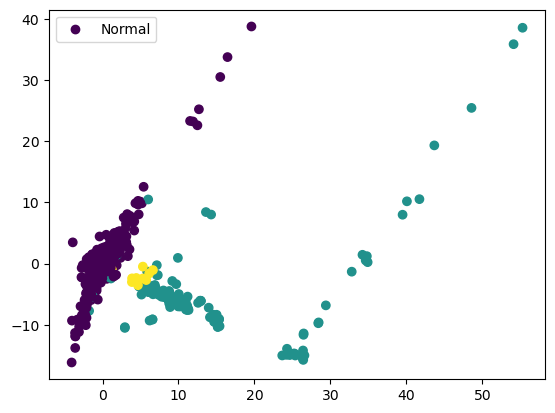

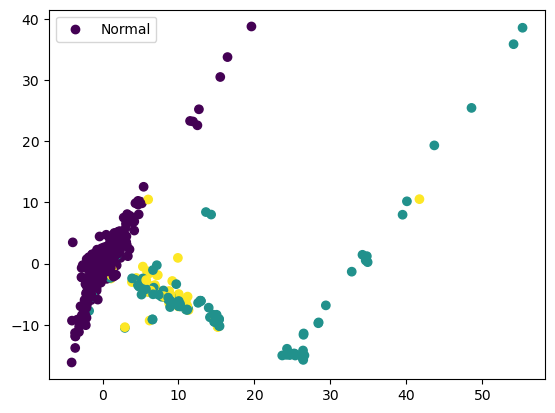

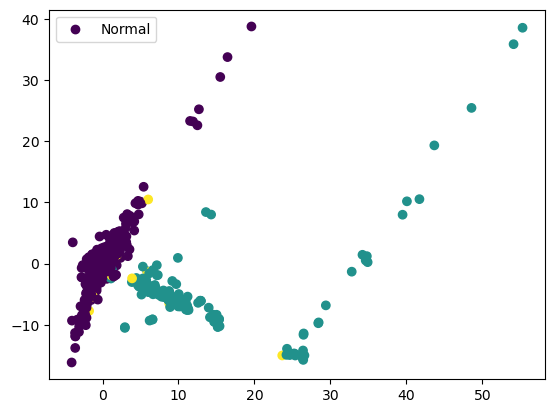

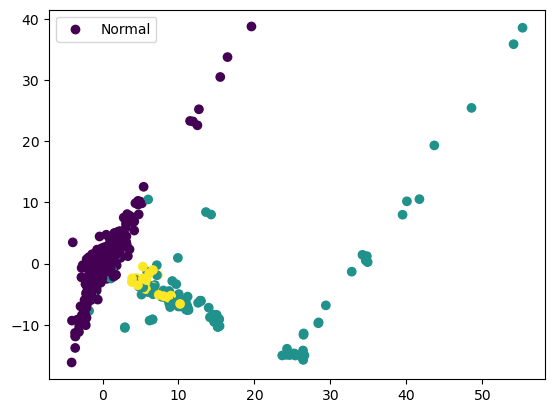

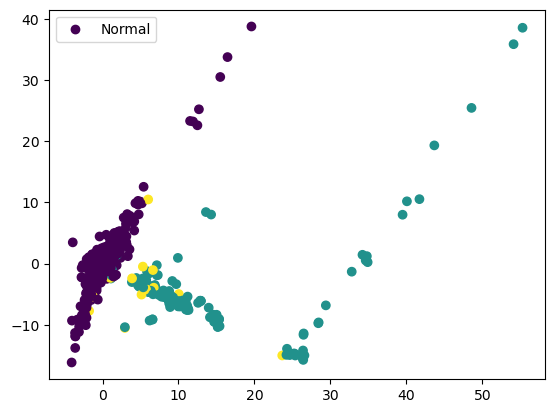

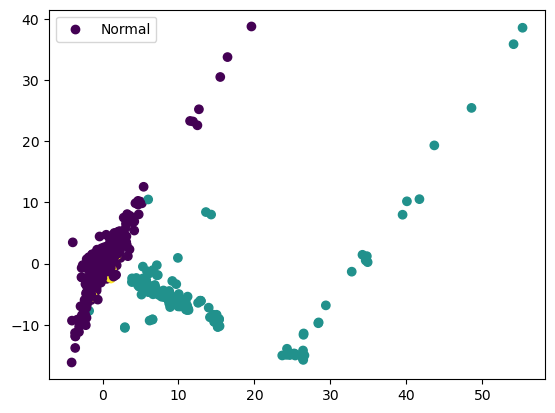

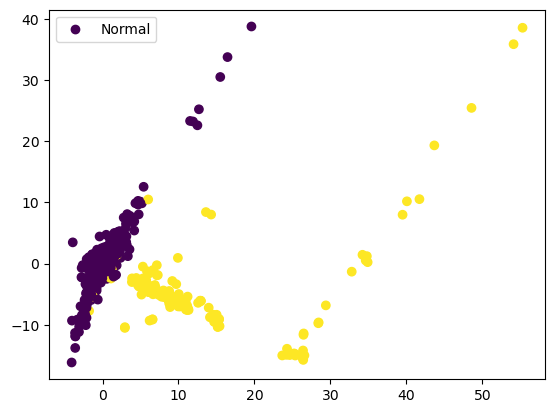

In [36]:

# plt import
import matplotlib.pyplot as plt


# Check variance
#apply pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_tsne)
print(pca.explained_variance_ratio_)

# visualize data
df_tsne = pca.transform(df_tsne)

c_outputs= [True_Autoencoder_anomalies, True_IsolationForest_anomalies, True_NN_anomalies, True_OneClassSVM_anomalies, True_RandomForestClassifier_anomalies, True_SVM_anomalies, True_TrueOutput_anomalies]
for c in c_outputs:
    plt.scatter(df_tsne[:,0], df_tsne[:,1], c=c)
    # legend colors used is is normal, is anomaly, is anomaly not detected
    plt.legend(['Normal', 'Anomaly', 'Anomaly not detected'])
    plt.show()
